**Title:**Fashion Recommendation System

**Subtitle:** Elevating Your Style with Personalized Suggestions

**Presented by:** [Başak Topçuoğlu-Arda Arslan-Hakan Sertuğ Şener]

**Date:** [25.12.2023]

**Introduction**

**Objective:** Introduce our cutting-edge Fashion Recommendation System designed to enhance the online shopping experience.

**Why It Matters?**

1-Improved User Experience

2-Increased Engagement

3-Reduced Decision Fatigue

4-Enhanced Conversion Rates

5-Competitive Advantage

6-Customer Loyalty

7-Data-Driven Insights

8-Adaptation to Changing Trends


**System Overview:**
Image Processing, Feature Extraction, Similarity Calculation, Recommendation Generation.

**Libraries:**

1-TensorFlow and Keras for deep learning.

2-MTCNN for face detection.

3-Other relevant libraries.

**Model:**

1-Feature Extraction Model: ResNet50 for powerful feature extraction.

2-Face Detection Model:MTCNN for identifying and excluding images with faces.
     

Öncelikli olarak drive hesabımızı Colab'a baglıyoruz.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install tensorflow
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.1 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
from mtcnn.mtcnn import MTCNN

We specify the location of the dataset and reference image.

{Datasetin ve referans resmin yerini belirtiyoruz.}


In [ ]:
image_directory = '/content/drive/My Drive/images_small/'

Function to extract features from the upper part of the image (clothing region)

{Görüntünün üst kısmından (giysi bölgesi) özellikleri çıkarma işlevi}


In [ ]:
def extract_clothing_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))

    # Assume the clothing area is in the upper part of the image(Giyim alanının görüntünün üst kısmında olduğunu varsayalım)

    img_data = image.img_to_array(img)[0:112, :, :]    #112=crop height

    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    return model.predict(img_data)

Function to detect faces in an image

(Bir görüntüdeki yüzleri algılama işlevi)


In [ ]:
def detect_faces(img_path):
    img = image.load_img(img_path)
    pixels = image.img_to_array(img)
    results = face_detector.detect_faces(pixels)
    return results

In [ ]:
def display_images(image_paths, title):
    plt.figure(figsize=(15, 5))
    plt.suptitle(title, fontsize=16)
    for i, img_path in enumerate(image_paths, 1):
        img = image.load_img(img_path)
        plt.subplot(1, len(image_paths), i)
        plt.imshow(img)
        plt.title(f"Image {i}")
        plt.axis('off')
    plt.show()

In [ ]:
model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
face_detector = MTCNN()

We printed the list of files in the directory

{Dizindeki dosyaların listesini yazdırdık}

In [ ]:
print("Files in the directory:", os.listdir(image_directory))

Files in the directory: ['10002.jpg', '10009.jpg', '10012.jpg', '10007.jpg', '10039.jpg', '10022.jpg', '10034.jpg', '10015.jpg', '10018.jpg', '10017.jpg', '10000.jpg', '10023.jpg', '10025.jpg', '10013.jpg', '10006.jpg', '10026.jpg', '10027.jpg', '10024.jpg', '10019.jpg', '10008.jpg', '10003.jpg', '10029.jpg', '10005.jpg', '10031.jpg', '10001.jpg', '10032.jpg', '10014.jpg', '10035.jpg', '10040.jpg', '10028.jpg', '10020.jpg', '10033.jpg', '10021.jpg', '10004.jpg', '10016.jpg', '10030.jpg', '10010.jpg', '10037.jpg', '10011.jpg', '10042.jpg', '10043.jpg', '10064.jpg', '10050.jpg', '10075.jpg', '10098.jpg', '10048.jpg', '10041.jpg', '10067.jpg', '10068.jpg', '10104.jpg', '10099.jpg', '10088.jpg', '10102.jpg', '10066.jpg', '10095.jpg', '10083.jpg', '10060.jpg', '10074.jpg', '10061.jpg', '10082.jpg', '10096.jpg', '10070.jpg', '10073.jpg', '10047.jpg', '10071.jpg', '10108.jpg', '10046.jpg', '10107.jpg', '10111.jpg', '10080.jpg', '10069.jpg', '10097.jpg', '10106.jpg', '10078.jpg', '10101.jpg', 

In [ ]:
reference_image_paths_male_tshirt = [
    "/content/drive/My Drive/tshirt(male).jpg",
]
reference_image_paths_pants = [
    "/content/drive/My Drive/fabric-pants(male).jpg",
]
reference_image_paths_female_tshirt = [
    "/content/drive/My Drive/tshirt(female).jpg",
]
reference_image_paths_baby_shoes = [
     "/content/drive/My Drive/baby_shoes.jpg",
]

reference_image_paths_baby_slippers = [
    "/content/drive/My Drive/baby_slippers.jpg",

]

reference_image_paths_sneakers = [
    "/content/drive/My Drive/sneakers.jpg",
]

reference_image_paths_dress = [
    "/content/drive/My Drive/dress.jpg",
]

reference_image_paths_short_sleeve_shirt = [
    "/content/drive/My Drive/short_sleeve_shirt.jpg",
]

reference_image_paths_female_jeans = [
    "/content/drive/My Drive/jeans(female).jpg",
]

reference_image_paths_skirt = [
    "/content/drive/My Drive/skirt.jpg",
]

reference_image_paths_male_jeans = [
    "/content/drive/My Drive/jeans(male).jpg",
]
reference_image_paths_male_watch = [
    "/content/drive/My Drive/watch(male).jpg",
]

reference_image_paths_hat = [
    "/content/drive/My Drive/hat.jpg",
]
reference_image_paths_female_watch = [
    "/content/drive/My Drive/watch(female).jpg",
]
reference_image_paths_male_shorts = [
    "/content/drive/My Drive/shorts(male).jpg",
]
reference_image_paths_bag = [
    "/content/drive/My Drive/bag.jpg",
]




Extracts features for each reference image

{Her referans görüntüsü için özellikleri çıkarır}

In [ ]:
reference_features_list_male_tshirt = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_male_tshirt]
reference_features_list_pants = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_pants]
reference_features_list_female_tshirt = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_female_tshirt]
reference_features_list_baby_shoes = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_baby_shoes]
reference_features_list_baby_slippers = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_baby_slippers]
reference_features_list_sneakers = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_sneakers]
reference_features_list_dress = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_dress]
reference_features_list_short_sleeve_shirt = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_short_sleeve_shirt]
reference_features_list_female_jeans = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_female_jeans]
reference_features_list_skirt = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_skirt]
reference_features_list_male_jeans = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_male_jeans]
reference_features_list_male_watch = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_male_watch]
reference_features_list_hat = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_hat]
reference_features_list_female_watch = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_female_watch]
reference_features_list_male_shorts = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_male_shorts]
reference_features_list_bag = [extract_clothing_features(os.path.join(image_directory, path)) for path in reference_image_paths_bag]


1/1 [==============================] - 0s 22ms/step


Shows reference images(Referans görsellerini gösterir)

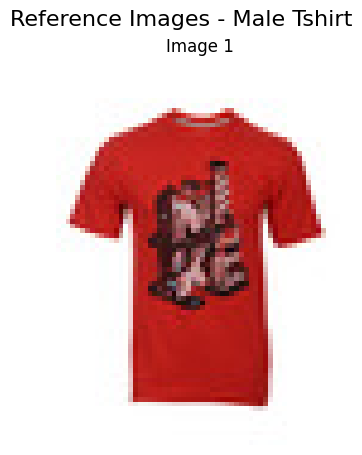

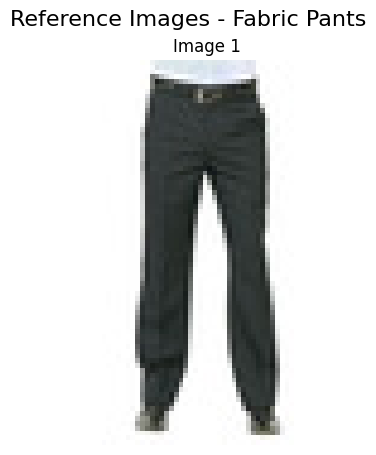

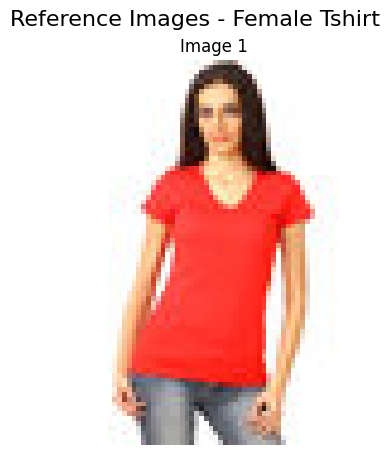

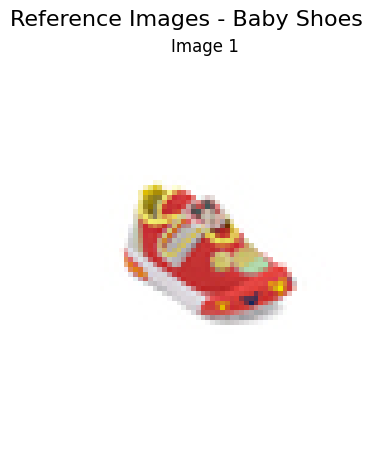

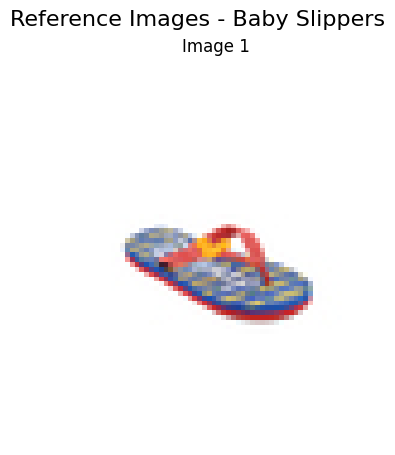

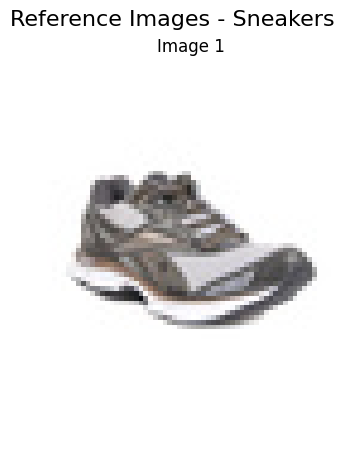

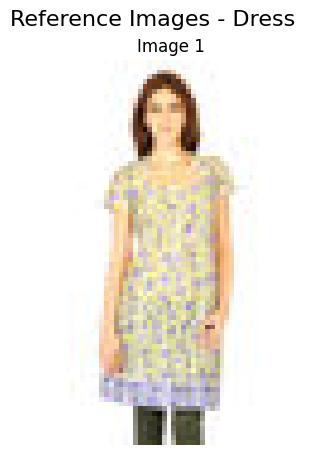

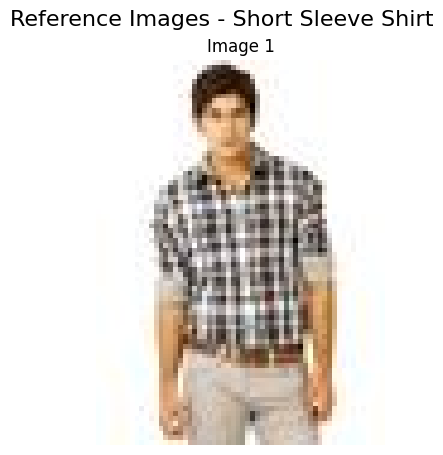

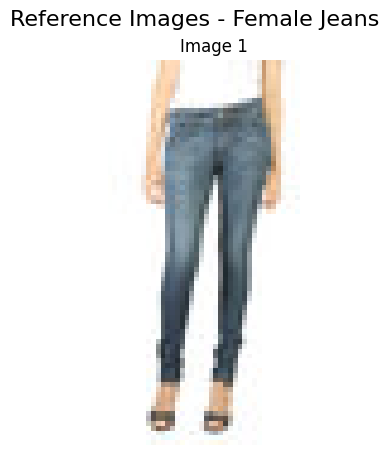

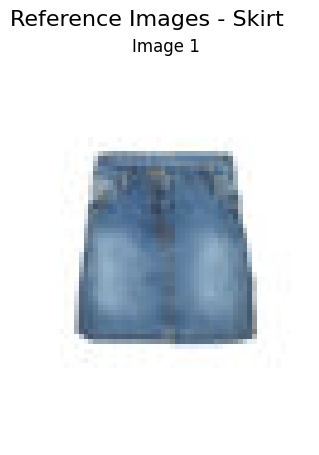

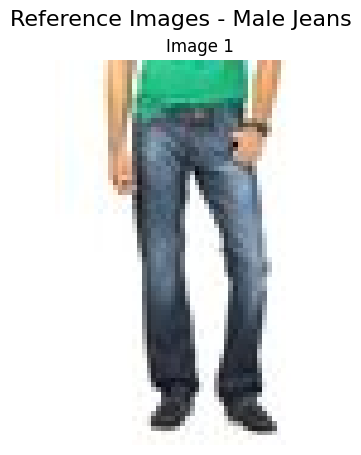

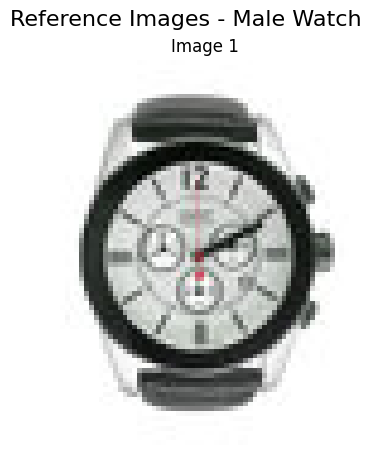

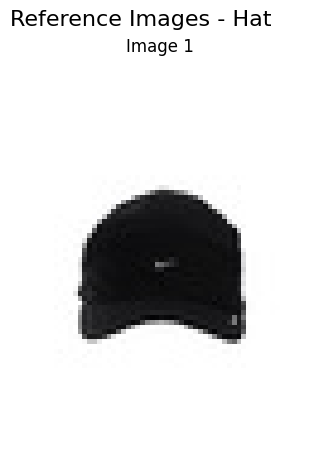

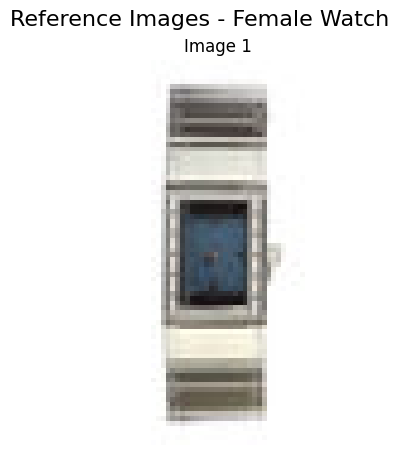

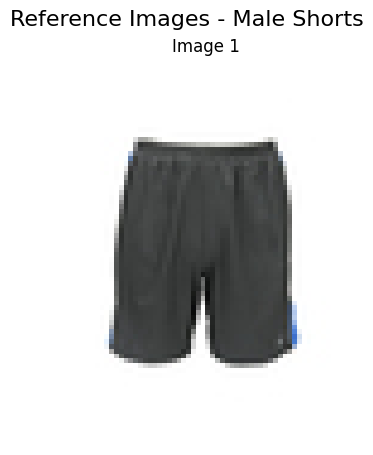

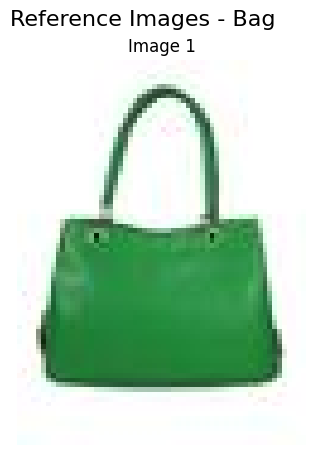

In [ ]:
display_images([os.path.join(image_directory, path) for path in reference_image_paths_male_tshirt], "Reference Images - Male Tshirt")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_pants], "Reference Images - Fabric Pants")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_female_tshirt], "Reference Images - Female Tshirt")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_baby_shoes], "Reference Images - Baby Shoes")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_baby_slippers], "Reference Images - Baby Slippers")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_sneakers], "Reference Images - Sneakers")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_dress], "Reference Images - Dress")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_short_sleeve_shirt], "Reference Images - Short Sleeve Shirt")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_female_jeans ], "Reference Images - Female Jeans")
display_images([os.path.join(image_directory, path) for path in  reference_image_paths_skirt], "Reference Images - Skirt")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_male_jeans], "Reference Images - Male Jeans")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_male_watch], "Reference Images - Male Watch")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_hat], "Reference Images - Hat")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_female_watch], "Reference Images - Female Watch")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_male_shorts], "Reference Images - Male Shorts")
display_images([os.path.join(image_directory, path) for path in reference_image_paths_bag], "Reference Images - Bag")

Sets the number of recommendations to display.(Görüntülenecek önerilerin sayısını ayarlar.)

In [ ]:
num_recommendations = 5

In [ ]:
recommendations_male_tshirt = []
recommendations_pants = []
recommendations_female_tshirt = []
recommendations_baby_shoes = []
recommendations_baby_slippers = []
recommendations_sneakers = []
recommendations_dress = []
recommendations_short_sleeve_shirt = []
recommendations_female_jeans = []
recommendations_skirt = []
recommendations_male_jeans = []
recommendations_male_watch = []
recommendations_hat = []
recommendations_female_watch = []
recommendations_male_shorts = []
recommendations_bag = []



In [ ]:
for file in os.listdir(image_directory):
    img_path = os.path.join(image_directory, file)

    # Detects faces in the image(Görüntüdeki yüzleri algılar)
    faces = detect_faces(img_path)

    # Excludes images containing faces(Yüz içeren görselleri hariç tutar)
    if not faces:
        # Extracts features of the current image(Geçerli görüntünün özelliklerini çıkarır)
        features = extract_clothing_features(img_path)

        # Calculate the similarity for male tshirt.
        similarity_male_tshirt = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_male_tshirt])
        recommendations_male_tshirt .append((file, similarity_male_tshirt))
        # Calculate the similarity for fabric pants.
        similarity_pants = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_pants])
        recommendations_pants .append((file, similarity_pants))
        # Calculate the similarity for female tshirt.
        similarity_female_tshirt = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_female_tshirt])
        recommendations_female_tshirt .append((file, similarity_female_tshirt))
        # Calculate the similarity for baby shoes.
        similarity_baby_shoes = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_baby_shoes])
        recommendations_baby_shoes .append((file, similarity_baby_shoes))
        # Calculate the similarity for baby slippers.
        similarity_baby_slippers = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_baby_slippers])
        recommendations_baby_slippers .append((file, similarity_baby_slippers))
        # Calculate the similarity for sneakers.
        similarity_sneakers = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_sneakers])
        recommendations_sneakers .append((file, similarity_sneakers))
        # Calculate the similarity for dress.
        similarity_dress = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_dress])
        recommendations_dress .append((file, similarity_dress))
        # Calculate the similarity for short sleeve shirt.
        similarity_short_sleeve_shirt = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_short_sleeve_shirt])
        recommendations_short_sleeve_shirt .append((file, similarity_short_sleeve_shirt))
        # Calculate the similarity for female jeans.
        similarity_female_jeans= np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_female_jeans])
        recommendations_female_jeans .append((file, similarity_female_jeans))
        # Calculate the similarity for skirt.
        similarity_skirt = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_skirt])
        recommendations_skirt .append((file, similarity_skirt))
        # Calculate the similarity for male jeans.
        similarity_male_jeans = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_male_jeans])
        recommendations_male_jeans .append((file, similarity_male_jeans))
        # Calculate the similarity for male watch.
        similarity_male_watch = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_male_watch])
        recommendations_male_watch .append((file, similarity_male_watch))
        # Calculate the similarity for hat.
        similarity_hat = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_hat])
        recommendations_hat .append((file, similarity_hat))
        # Calculate the similarity for female watch.
        similarity_female_watch = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_female_watch])
        recommendations_female_watch .append((file, similarity_female_watch))
        # Calculate the similarity for male shorts.
        similarity_male_shorts = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_male_shorts])
        recommendations_male_shorts .append((file, similarity_male_shorts))
        # Calculate the similarity for bag.
        similarity_bag = np.mean([cosine_similarity(features.reshape(1, -1), ref_features.reshape(1, -1))[0][0] for ref_features in reference_features_list_bag ])
        recommendations_bag .append((file, similarity_bag))


1/1 [==============================] - 0s 24ms/step


Displays top N recommended images(En iyi N önerilen görseli görüntüler)

Top Recommendations for Tshirt:
/content/drive/My Drive/images_small/10009.jpg - Similarity Ratio: 1.0000
/content/drive/My Drive/images_small/10763.jpg - Similarity Ratio: 0.6601
/content/drive/My Drive/images_small/10008.jpg - Similarity Ratio: 0.6405
/content/drive/My Drive/images_small/10032.jpg - Similarity Ratio: 0.6375
/content/drive/My Drive/images_small/10750.jpg - Similarity Ratio: 0.6274


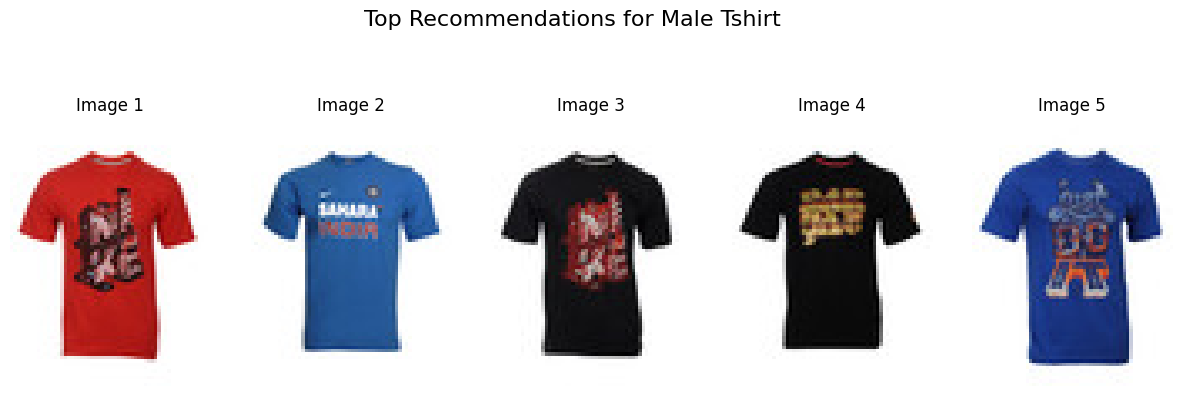

In [ ]:
recommendations_male_tshirt.sort(key=lambda x: x[1], reverse=True)  #Sorts suggestions by similarity(Önerileri benzerliğe göre sıralar)
top_recommendations_paths_male_tshirt = [os.path.join(image_directory, rec[0]) for rec in recommendations_male_tshirt[:num_recommendations]]
print("Top Recommendations for Tshirt:")
for path, similarity in zip(top_recommendations_paths_male_tshirt, [rec[1] for rec in recommendations_male_tshirt[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_male_tshirt, "Top Recommendations for Male Tshirt")

Top Recommendations for Fabric Pants:
/content/drive/My Drive/images_small/10257.jpg - Similarity Ratio: 1.0000
/content/drive/My Drive/images_small/10258.jpg - Similarity Ratio: 0.9016
/content/drive/My Drive/images_small/10259.jpg - Similarity Ratio: 0.8866
/content/drive/My Drive/images_small/10261.jpg - Similarity Ratio: 0.8843
/content/drive/My Drive/images_small/10262.jpg - Similarity Ratio: 0.8456


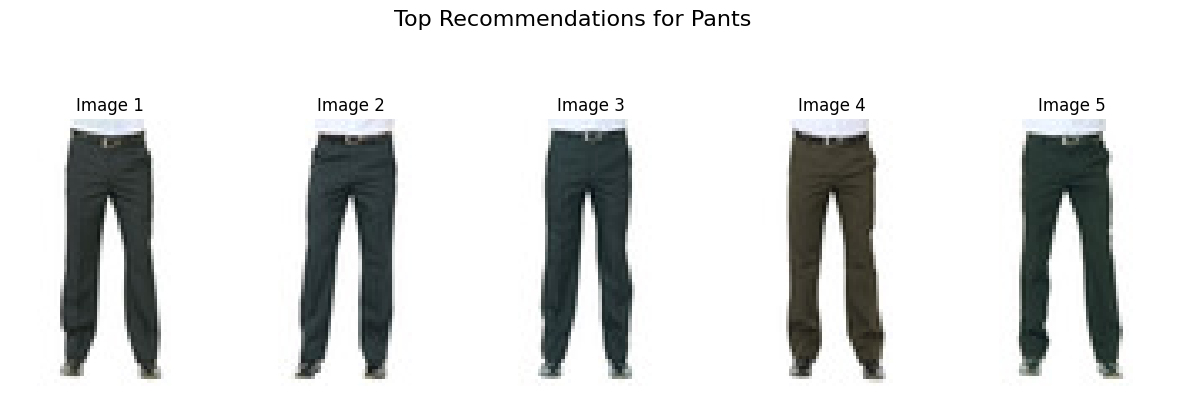

In [ ]:
recommendations_pants.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_pants = [os.path.join(image_directory, rec[0]) for rec in recommendations_pants[:num_recommendations]]
print("Top Recommendations for Fabric Pants:")
for path, similarity in zip(top_recommendations_paths_pants, [rec[1] for rec in recommendations_pants[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_pants, "Top Recommendations for Pants")

Top Recommendations for Female Pants:
/content/drive/My Drive/images_small/10403.jpg - Similarity Ratio: 0.7486
/content/drive/My Drive/images_small/10567.jpg - Similarity Ratio: 0.7464
/content/drive/My Drive/images_small/10402.jpg - Similarity Ratio: 0.7385
/content/drive/My Drive/images_small/10575.jpg - Similarity Ratio: 0.6918
/content/drive/My Drive/images_small/10510.jpg - Similarity Ratio: 0.6876


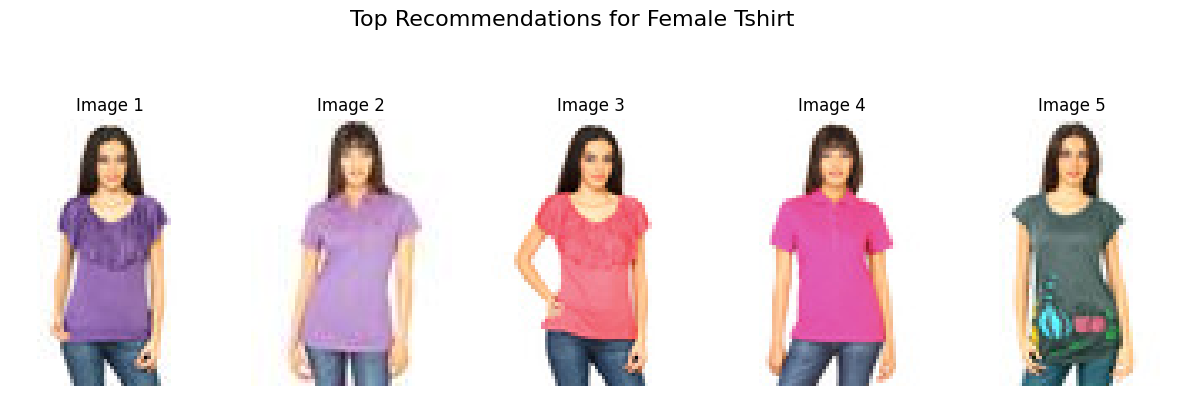

In [ ]:
recommendations_female_tshirt.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_female_tshirt = [os.path.join(image_directory, rec[0]) for rec in recommendations_female_tshirt[:num_recommendations]]
print("Top Recommendations for Female Pants:")
for path, similarity in zip(top_recommendations_paths_female_tshirt, [rec[1] for rec in recommendations_female_tshirt[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_female_tshirt, "Top Recommendations for Female Tshirt")

Top Recommendations for Baby Shoes:
/content/drive/My Drive/images_small/10756.jpg - Similarity Ratio: 1.0000
/content/drive/My Drive/images_small/10768.jpg - Similarity Ratio: 0.7373
/content/drive/My Drive/images_small/10742.jpg - Similarity Ratio: 0.7054
/content/drive/My Drive/images_small/10770.jpg - Similarity Ratio: 0.6992
/content/drive/My Drive/images_small/10755.jpg - Similarity Ratio: 0.6848


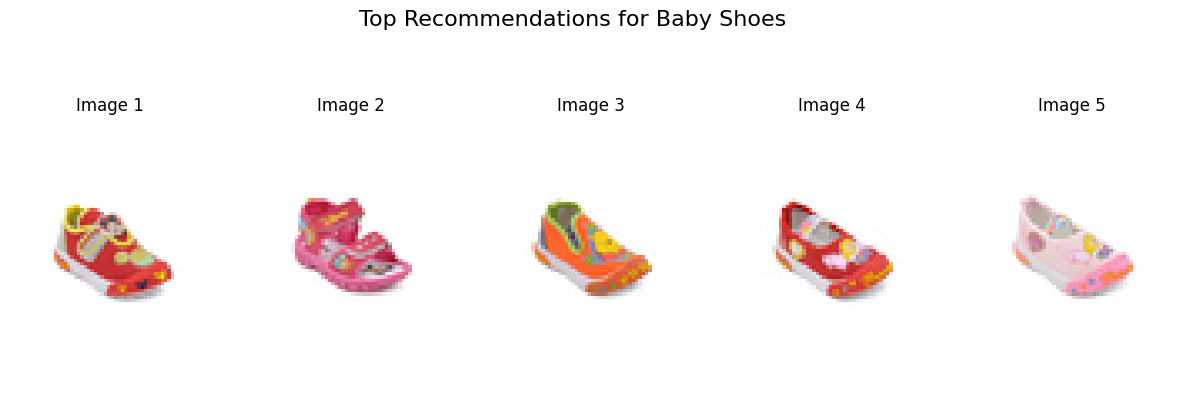

In [ ]:
recommendations_baby_shoes.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_baby_shoes = [os.path.join(image_directory, rec[0]) for rec in recommendations_baby_shoes[:num_recommendations]]
print("Top Recommendations for Baby Shoes:")
for path, similarity in zip(top_recommendations_paths_baby_shoes, [rec[1] for rec in recommendations_baby_shoes[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_baby_shoes, "Top Recommendations for Baby Shoes")

Top Recommendations for Baby Slippers:
/content/drive/My Drive/images_small/10748.jpg - Similarity Ratio: 1.0000
/content/drive/My Drive/images_small/10743.jpg - Similarity Ratio: 0.7965
/content/drive/My Drive/images_small/10749.jpg - Similarity Ratio: 0.7669
/content/drive/My Drive/images_small/10757.jpg - Similarity Ratio: 0.7516
/content/drive/My Drive/images_small/10746.jpg - Similarity Ratio: 0.7457


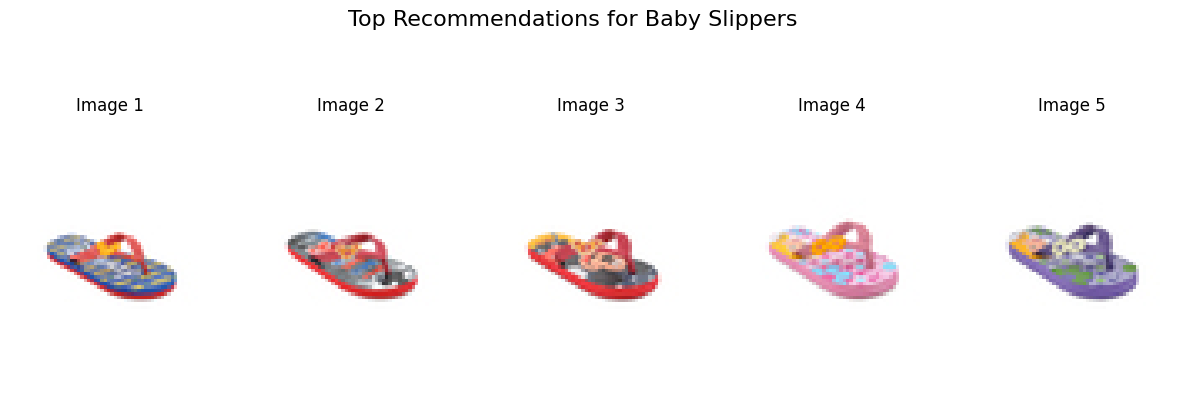

In [ ]:
recommendations_baby_slippers.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_baby_slippers = [os.path.join(image_directory, rec[0]) for rec in recommendations_baby_slippers[:num_recommendations]]
print("Top Recommendations for Baby Slippers:")
for path, similarity in zip(top_recommendations_paths_baby_slippers, [rec[1] for rec in recommendations_baby_slippers[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_baby_slippers, "Top Recommendations for Baby Slippers")

Top Recommendations for Sneakers:
/content/drive/My Drive/images_small/10035.jpg - Similarity Ratio: 1.0000
/content/drive/My Drive/images_small/10176.jpg - Similarity Ratio: 0.6635
/content/drive/My Drive/images_small/10088.jpg - Similarity Ratio: 0.6625
/content/drive/My Drive/images_small/10039.jpg - Similarity Ratio: 0.6601
/content/drive/My Drive/images_small/10082.jpg - Similarity Ratio: 0.6529


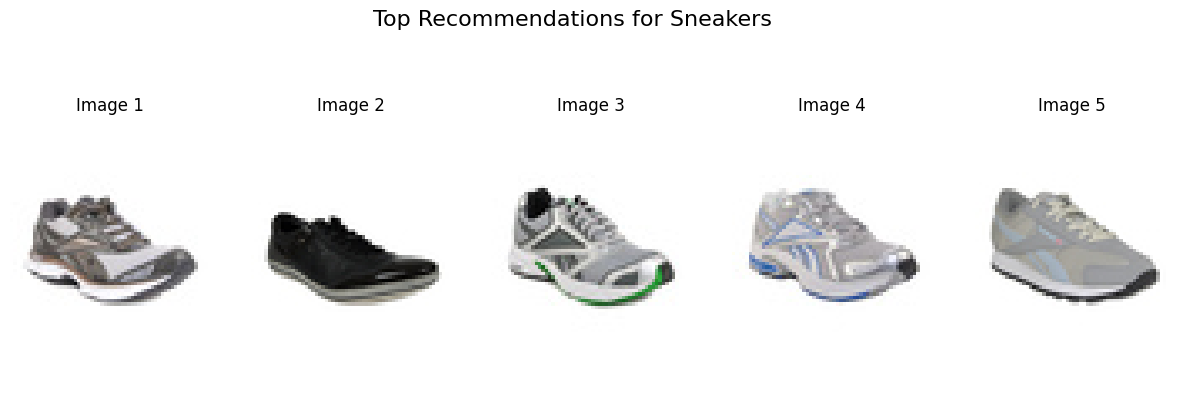

In [ ]:
recommendations_sneakers.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_sneakers = [os.path.join(image_directory, rec[0]) for rec in recommendations_sneakers[:num_recommendations]]
print("Top Recommendations for Sneakers:")
for path, similarity in zip(top_recommendations_paths_sneakers, [rec[1] for rec in recommendations_sneakers[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_sneakers, "Top Recommendations for Sneakers")

Top Recommendations for Dress:
/content/drive/My Drive/images_small/11581.jpg - Similarity Ratio: 0.7878
/content/drive/My Drive/images_small/11624.jpg - Similarity Ratio: 0.7839
/content/drive/My Drive/images_small/11561.jpg - Similarity Ratio: 0.7540
/content/drive/My Drive/images_small/11539.jpg - Similarity Ratio: 0.7538
/content/drive/My Drive/images_small/11534.jpg - Similarity Ratio: 0.7520


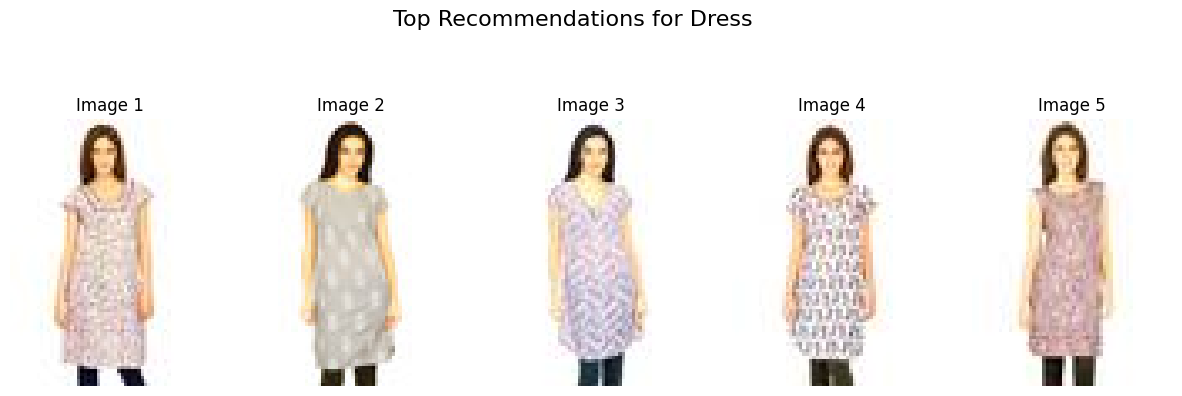

In [ ]:
recommendations_dress.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_dress = [os.path.join(image_directory, rec[0]) for rec in recommendations_dress[:num_recommendations]]
print("Top Recommendations for Dress:")
for path, similarity in zip(top_recommendations_paths_dress, [rec[1] for rec in recommendations_dress[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_dress, "Top Recommendations for Dress")

Top Recommendations for Short Sleeve Shirt:
/content/drive/My Drive/images_small/10481.jpg - Similarity Ratio: 0.7579
/content/drive/My Drive/images_small/10441.jpg - Similarity Ratio: 0.7572
/content/drive/My Drive/images_small/10795.jpg - Similarity Ratio: 0.7468
/content/drive/My Drive/images_small/10797.jpg - Similarity Ratio: 0.7138
/content/drive/My Drive/images_small/10474.jpg - Similarity Ratio: 0.7116


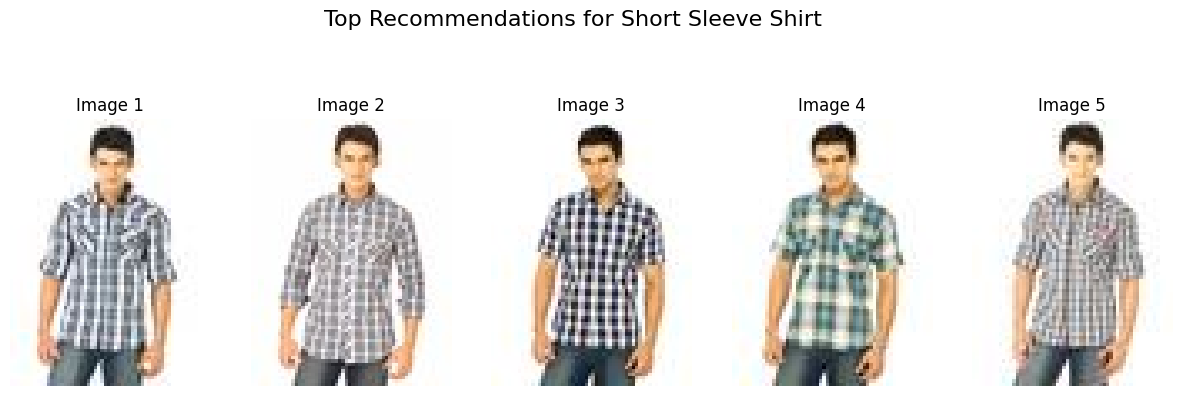

In [ ]:
recommendations_short_sleeve_shirt.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_short_sleeve_shirt = [os.path.join(image_directory, rec[0]) for rec in recommendations_short_sleeve_shirt[:num_recommendations]]
print("Top Recommendations for Short Sleeve Shirt:")
for path, similarity in zip(top_recommendations_paths_short_sleeve_shirt, [rec[1] for rec in recommendations_short_sleeve_shirt[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_short_sleeve_shirt, "Top Recommendations for Short Sleeve Shirt")

Top Recommendations for Female Jeans:
/content/drive/My Drive/images_small/11241.jpg - Similarity Ratio: 0.7216
/content/drive/My Drive/images_small/11240.jpg - Similarity Ratio: 0.7193
/content/drive/My Drive/images_small/11236.jpg - Similarity Ratio: 0.7140
/content/drive/My Drive/images_small/11234.jpg - Similarity Ratio: 0.6752
/content/drive/My Drive/images_small/11302.jpg - Similarity Ratio: 0.6593


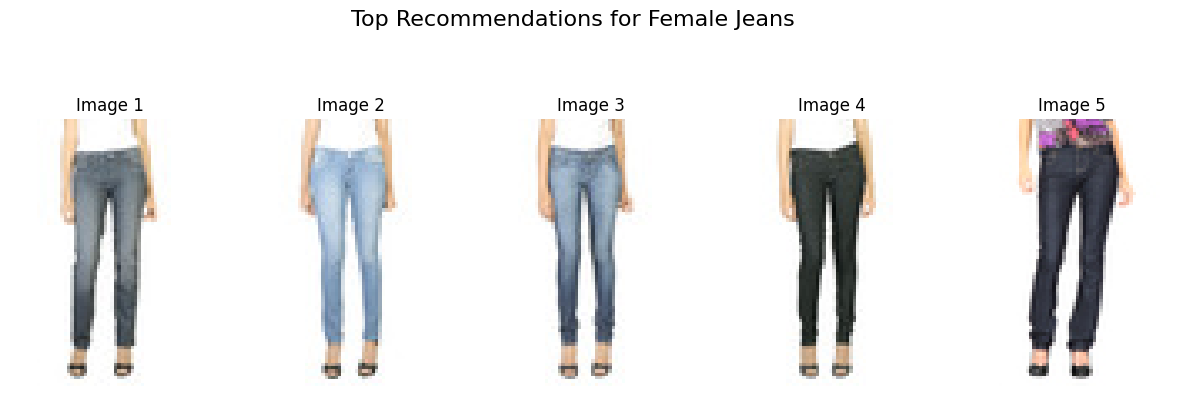

In [ ]:
recommendations_female_jeans.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_female_jeans = [os.path.join(image_directory, rec[0]) for rec in recommendations_female_jeans[:num_recommendations]]
print("Top Recommendations for Female Jeans:")
for path, similarity in zip(top_recommendations_paths_female_jeans, [rec[1] for rec in recommendations_female_jeans[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_female_jeans, "Top Recommendations for Female Jeans")

Top Recommendations for Skirt:
/content/drive/My Drive/images_small/10001.jpg - Similarity Ratio: 1.0000
/content/drive/My Drive/images_small/10654.jpg - Similarity Ratio: 0.7192
/content/drive/My Drive/images_small/10655.jpg - Similarity Ratio: 0.7192
/content/drive/My Drive/images_small/10002.jpg - Similarity Ratio: 0.6695
/content/drive/My Drive/images_small/10661.jpg - Similarity Ratio: 0.6689


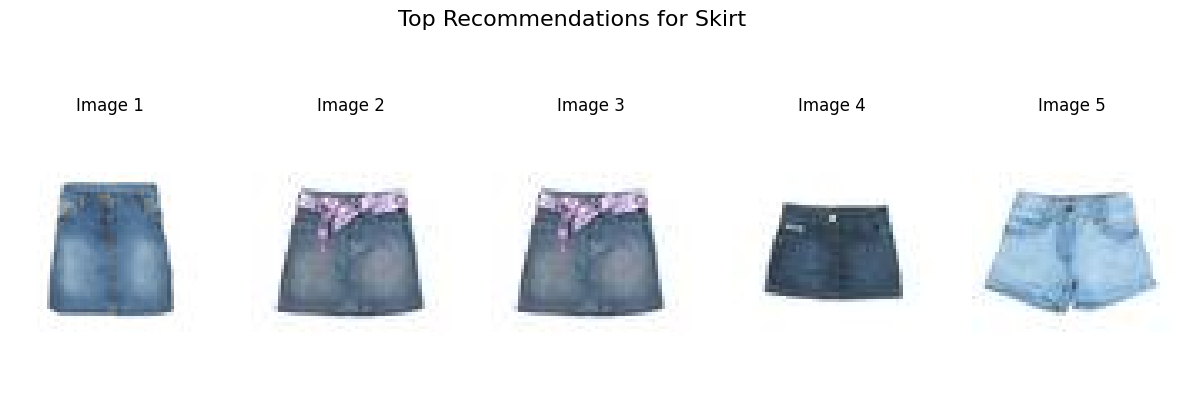

In [ ]:
recommendations_skirt.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_skirt = [os.path.join(image_directory, rec[0]) for rec in recommendations_skirt[:num_recommendations]]
print("Top Recommendations for Skirt:")
for path, similarity in zip(top_recommendations_paths_skirt, [rec[1] for rec in recommendations_skirt[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_skirt, "Top Recommendations for Skirt")

Top Recommendations for Male Jeans:
/content/drive/My Drive/images_small/10438.jpg - Similarity Ratio: 1.0000
/content/drive/My Drive/images_small/10489.jpg - Similarity Ratio: 0.7483
/content/drive/My Drive/images_small/10487.jpg - Similarity Ratio: 0.7011
/content/drive/My Drive/images_small/11306.jpg - Similarity Ratio: 0.6521
/content/drive/My Drive/images_small/11334.jpg - Similarity Ratio: 0.6511


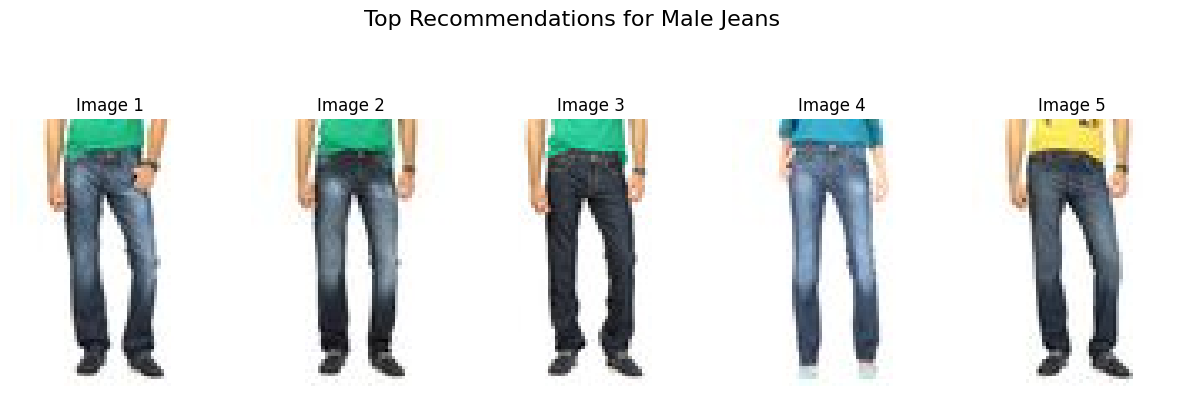

In [ ]:
recommendations_male_jeans.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_male_jeans = [os.path.join(image_directory, rec[0]) for rec in recommendations_male_jeans[:num_recommendations]]
print("Top Recommendations for Male Jeans:")
for path, similarity in zip(top_recommendations_paths_male_jeans, [rec[1] for rec in recommendations_male_jeans[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_male_jeans, "Top Recommendations for Male Jeans")

Top Recommendations for Male Watch:
/content/drive/My Drive/images_small/10239.jpg - Similarity Ratio: 1.0000
/content/drive/My Drive/images_small/11226.jpg - Similarity Ratio: 0.6190
/content/drive/My Drive/images_small/10587.jpg - Similarity Ratio: 0.6055
/content/drive/My Drive/images_small/10608.jpg - Similarity Ratio: 0.5910
/content/drive/My Drive/images_small/11207.jpg - Similarity Ratio: 0.5758


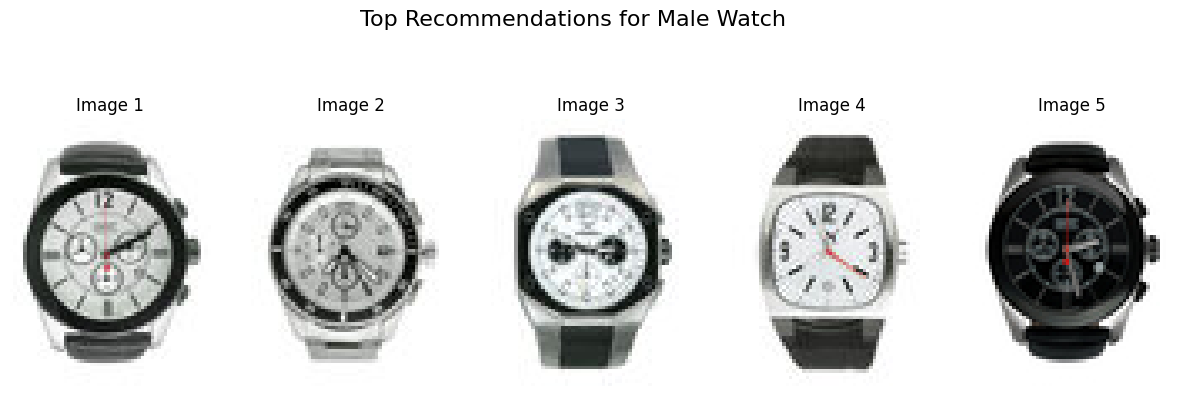

In [ ]:
recommendations_male_watch.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_male_watch = [os.path.join(image_directory, rec[0]) for rec in recommendations_male_watch[:num_recommendations]]
print("Top Recommendations for Male Watch:")
for path, similarity in zip(top_recommendations_paths_male_watch, [rec[1] for rec in recommendations_male_watch[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_male_watch, "Top Recommendations for Male Watch")

Top Recommendations for Hat:
/content/drive/My Drive/images_small/10786.jpg - Similarity Ratio: 1.0000
/content/drive/My Drive/images_small/10785.jpg - Similarity Ratio: 0.8570
/content/drive/My Drive/images_small/10784.jpg - Similarity Ratio: 0.7237
/content/drive/My Drive/images_small/10014.jpg - Similarity Ratio: 0.5739
/content/drive/My Drive/images_small/10603.jpg - Similarity Ratio: 0.5616


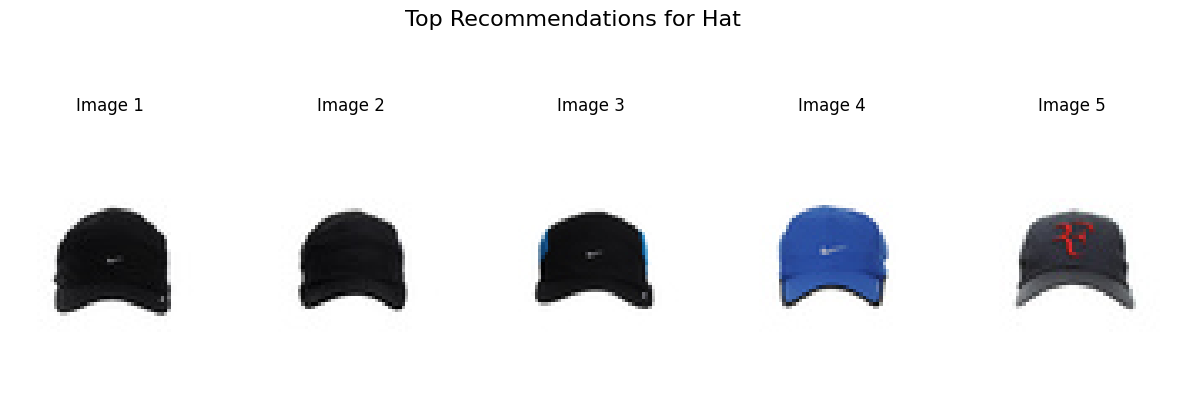

In [ ]:
recommendations_hat.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_hat = [os.path.join(image_directory, rec[0]) for rec in recommendations_hat[:num_recommendations]]
print("Top Recommendations for Hat:")
for path, similarity in zip(top_recommendations_paths_hat, [rec[1] for rec in recommendations_hat[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_hat, "Top Recommendations for Hat")

Top Recommendations for Female Watch:
/content/drive/My Drive/images_small/10108.jpg - Similarity Ratio: 1.0000
/content/drive/My Drive/images_small/10109.jpg - Similarity Ratio: 0.7580
/content/drive/My Drive/images_small/10105.jpg - Similarity Ratio: 0.6515
/content/drive/My Drive/images_small/11210.jpg - Similarity Ratio: 0.6312
/content/drive/My Drive/images_small/10704.jpg - Similarity Ratio: 0.6040


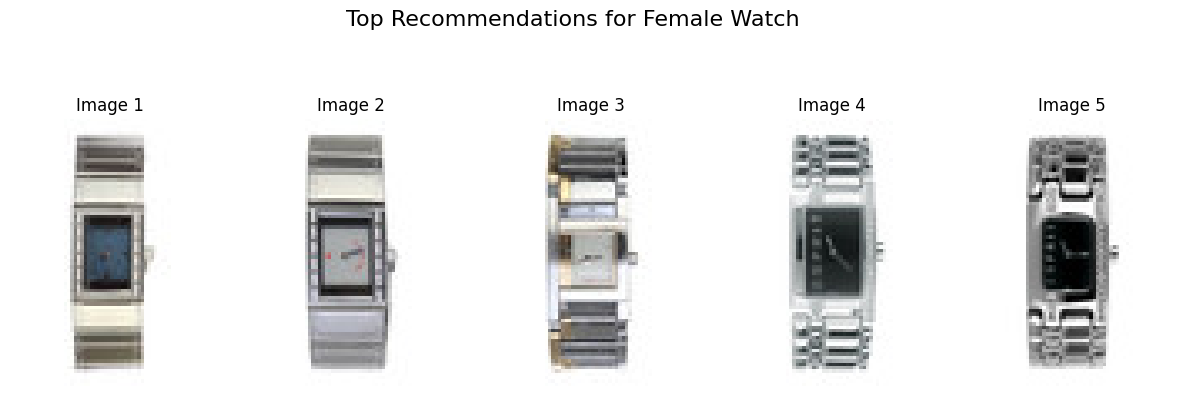

In [ ]:
recommendations_female_watch.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_female_watch = [os.path.join(image_directory, rec[0]) for rec in recommendations_female_watch[:num_recommendations]]
print("Top Recommendations for Female Watch:")
for path, similarity in zip(top_recommendations_paths_female_watch, [rec[1] for rec in recommendations_female_watch[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_female_watch, "Top Recommendations for Female Watch")

Top Recommendations for Male Shorts:
/content/drive/My Drive/images_small/10004.jpg - Similarity Ratio: 1.0000
/content/drive/My Drive/images_small/10778.jpg - Similarity Ratio: 0.6542
/content/drive/My Drive/images_small/10020.jpg - Similarity Ratio: 0.6214
/content/drive/My Drive/images_small/10661.jpg - Similarity Ratio: 0.6022
/content/drive/My Drive/images_small/10002.jpg - Similarity Ratio: 0.5734


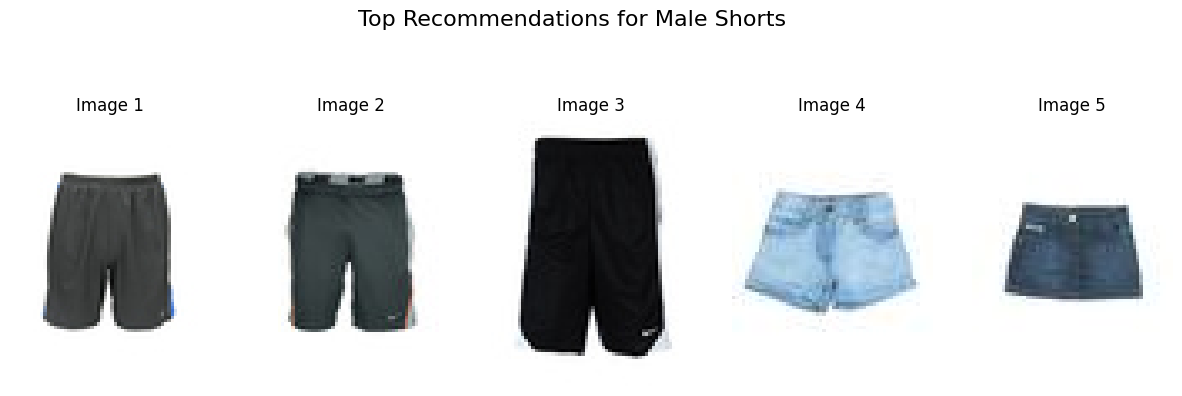

In [ ]:
recommendations_male_shorts.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_male_shorts = [os.path.join(image_directory, rec[0]) for rec in recommendations_male_shorts[:num_recommendations]]
print("Top Recommendations for Male Shorts:")
for path, similarity in zip(top_recommendations_paths_male_shorts, [rec[1] for rec in recommendations_male_shorts[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_male_shorts, "Top Recommendations for Male Shorts")

Top Recommendations for Male Bag:
/content/drive/My Drive/images_small/10196.jpg - Similarity Ratio: 1.0000
/content/drive/My Drive/images_small/10197.jpg - Similarity Ratio: 0.8028
/content/drive/My Drive/images_small/10254.jpg - Similarity Ratio: 0.7721
/content/drive/My Drive/images_small/10725.jpg - Similarity Ratio: 0.7395
/content/drive/My Drive/images_small/10198.jpg - Similarity Ratio: 0.7319


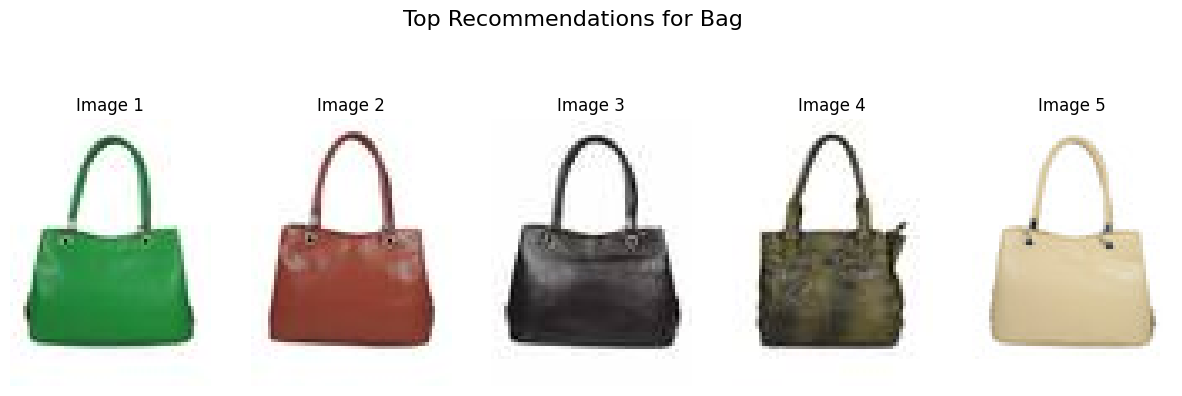

In [ ]:
recommendations_bag.sort(key=lambda x: x[1], reverse=True)
top_recommendations_paths_bag = [os.path.join(image_directory, rec[0]) for rec in recommendations_bag[:num_recommendations]]
print("Top Recommendations for Male Bag:")
for path, similarity in zip(top_recommendations_paths_bag, [rec[1] for rec in recommendations_bag[:num_recommendations]]):
    print(f"{path} - Similarity Ratio: {similarity:.4f}")
display_images(top_recommendations_paths_bag, "Top Recommendations for Bag")